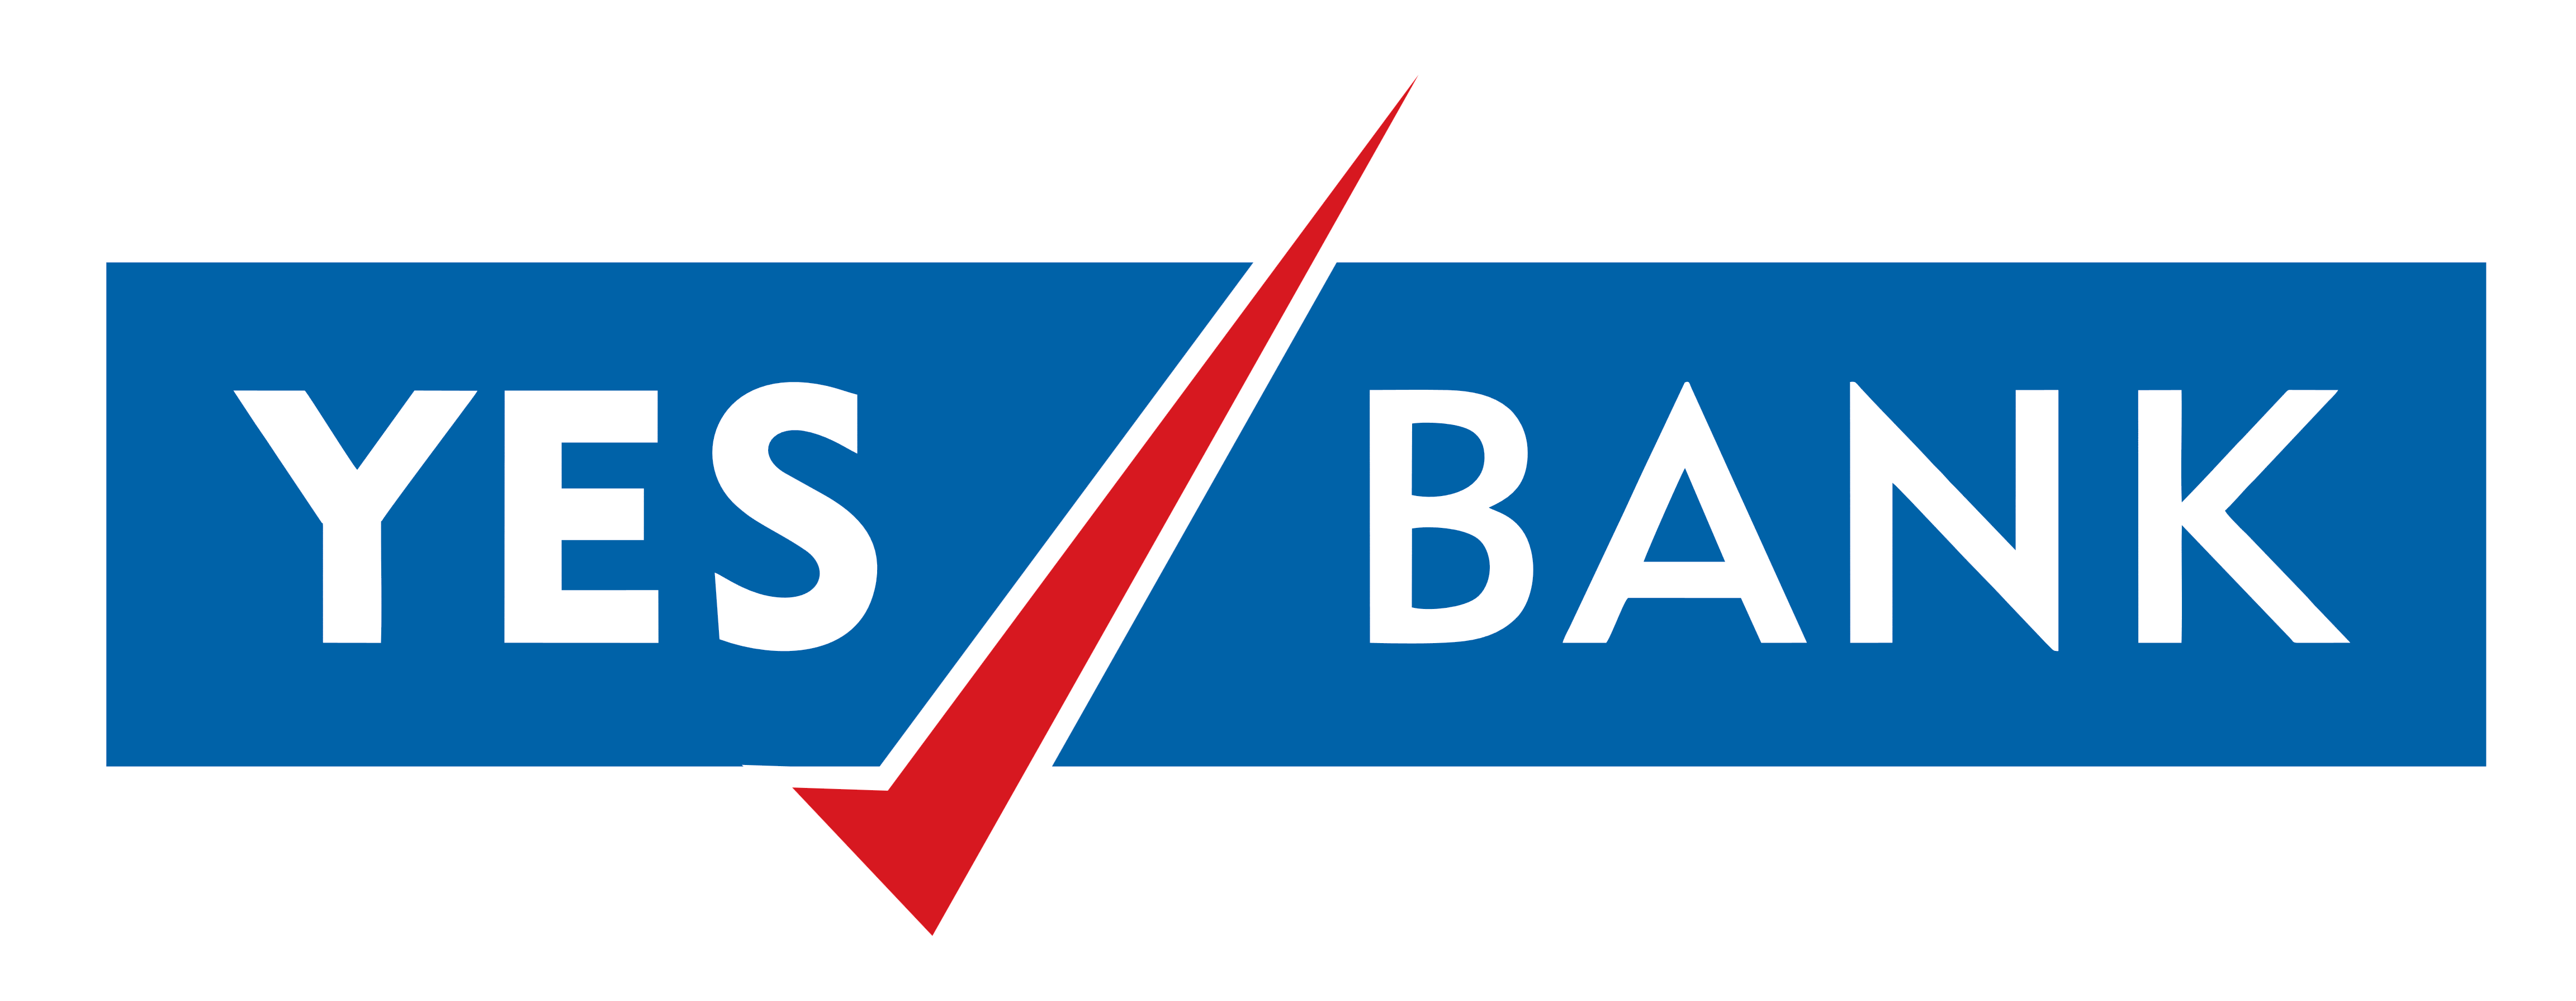

# **Project Name**    - Yes Bank Stock Closing Price Prediction

**Project Type**    - Regression

**Contribution**    - Individual

**Team Member 1 -** Amrit Roy


# **Project Summary -**

The objective of this project is to analyze the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a prominent bank in the Indian financial domain. The dataset used in this project consisted of monthly stock prices of Yes Bank since its inception, including closing, starting, highest, and lowest stock prices.

To predict the stock's closing price, I developed three models namely Ridge_regression, Random Forest and XGBoost Regressor model was developed. The model was trained using the historical stock price data and various features such as mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns in the data.The performance of the model was evaluated using metrics like RMSE (Root Mean Squared Error),adjustes R2 and R2 score. xGBoost regressor performed well among the three with high R2 score and adjusted R2.

Overall, the project aimed to contribute to a better understanding of the relationship between the fraud case and Yes Bank's stock prices, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock

---

# **GitHub Link -**

**Provide your GitHub Link here:** https://github.com/er-amritroy/Yes-Bank-Stock-Closing-Price-Prediction-By-Regression

**Provide your DataSet Link here:** https://drive.google.com/file/d/1pPOEZc0Y8qyVlk3YA4LyAXt74tRkl1nd/view?usp=drive_link

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

#### **Business Objective :**

The ultimate business objective is to leverage the regression model to provide accurate predictions of the closing price of Yes Bank stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases like Rana Kapoor and align investment strategies with financial goals.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Required Library
import numpy as np                         #numerical computations
import pandas as pd                        #data manipulations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')   # do not disturb mode

## **1. Importing and Loading data**

In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Regression ML Capstone Project/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = dataset.shape

print('Total Rows in Dataset:',rows)
print('Total Columns in Dataset:',columns)

Total Rows in Dataset: 185
Total Columns in Dataset: 5


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

According to the my analysis, the dataset have 5 columns and 185 rows. where just one `date` column is in object format and the others are formatted as per type. The dataset does not contain any Null values or duplicate rows

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe   also called 5 number summury
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

`Date` - Date of the record. It has monthly dates from July 2005 to November 2020.

`Open`- opening price of the share/stock (Numerical)

`High` - Highest price of the share for that day (Numerical)

`Low` - Lowest Price of the share for that day (Numerical)

`Close` - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('Unique Values in', i, 'are', dataset[i].nunique())

Unique Values in Date are 185
Unique Values in Open are 183
Unique Values in High are 184
Unique Values in Low are 183
Unique Values in Close are 185


## 3. ***Data Wrangling***

In [ ]:
# Write your code to make your dataset analysis ready.
# Lets create a copy of our dataset will stored safely
df = dataset.copy()

In [ ]:
# As we know the `Date` column data type is object, so we have to change it into datetime format
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date

from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [ ]:
# lets check our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Now Format and data type of date feature has changed into datetime

### What all manipulations have you done and insights you found?

I have changed datatype of Date variable to datetime. Remaining all variables are numerical. numerical variables are Open,High, Low (independent variable) and Close (dependent variable). There are no null values and duplicate values. Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data, there are aslo some outliers present in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES
indep_var=df[['High','Low','Open']]
dep_var=df['Close']

#### Chart - 1

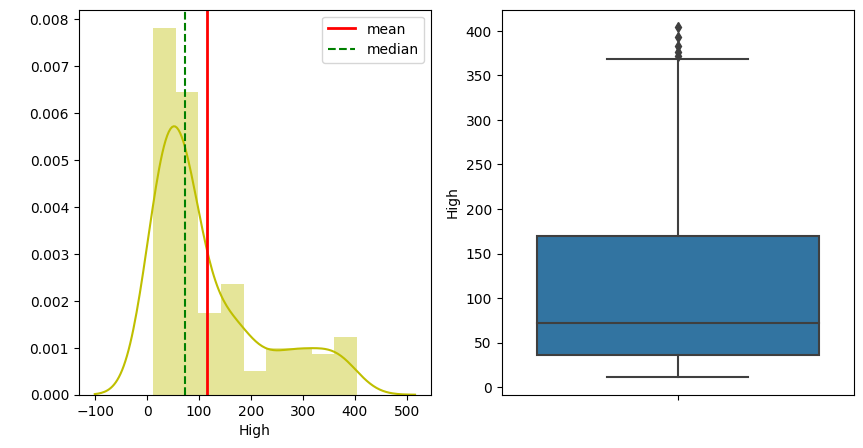

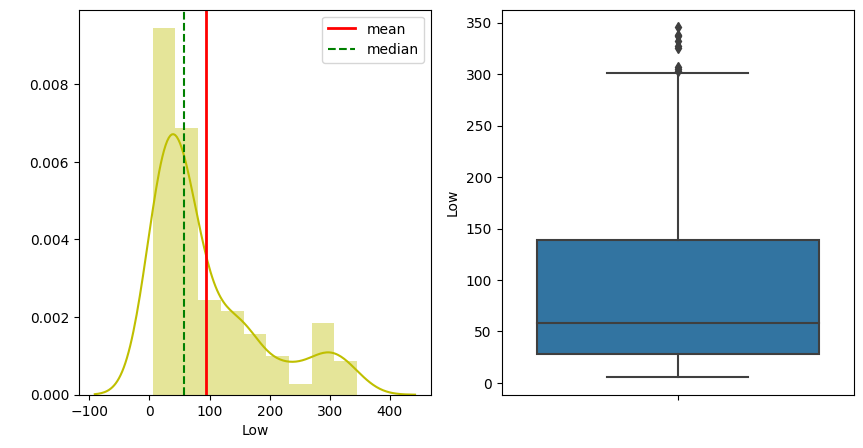

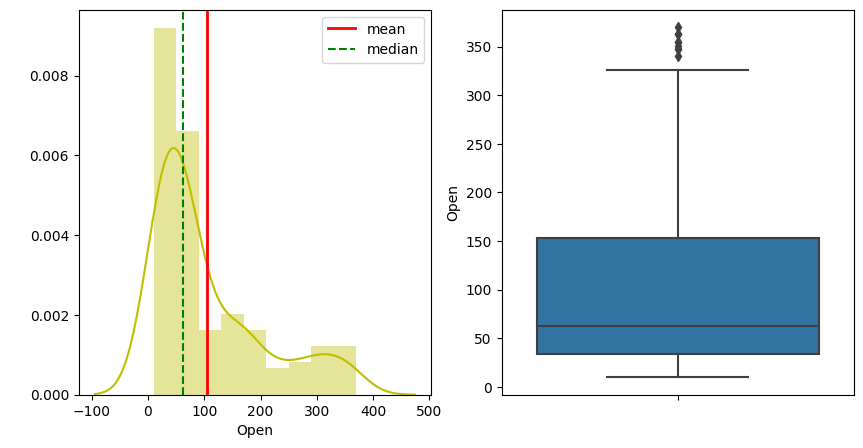

In [ ]:
# Chart - 1 visualization code
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var],color='y')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)
    plt.axvline(df[var].mean(), color='red', linewidth=2, label='mean')                              # axvline plots a vertical line at a value (mean in this case)
    plt.axvline(df[var].median(), color='green', linestyle='dashed', linewidth=1.5, label='median')  # axvline plots a vertical line at a value (median in this case).
    plt.legend()
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

To know about distributions across all independent variables, a distribution plot of the variable can provide useful insights into its distribution, shape, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required, there are also some outlier present in our dataset.

##### 3. Will the gained insights help creating a positive business impact?

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 2

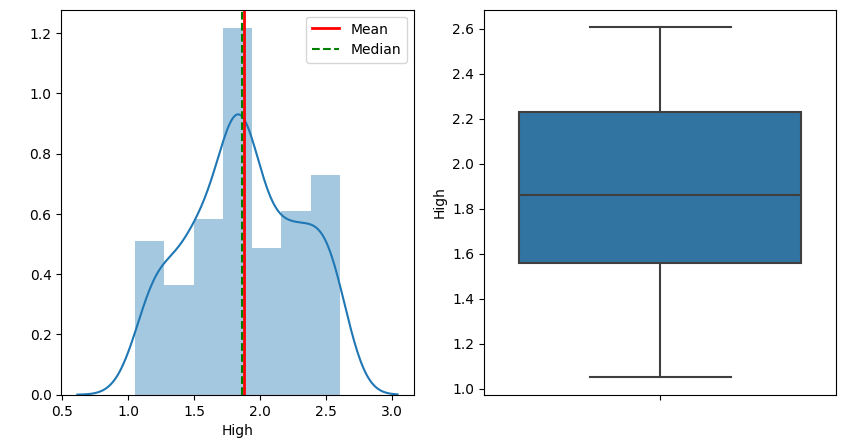

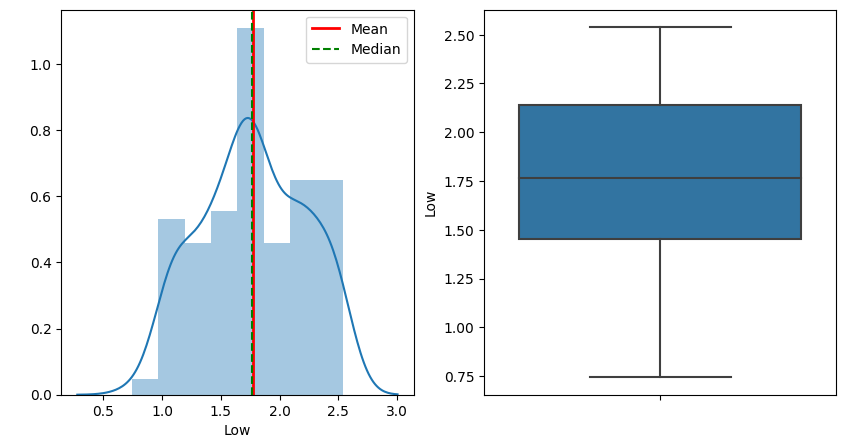

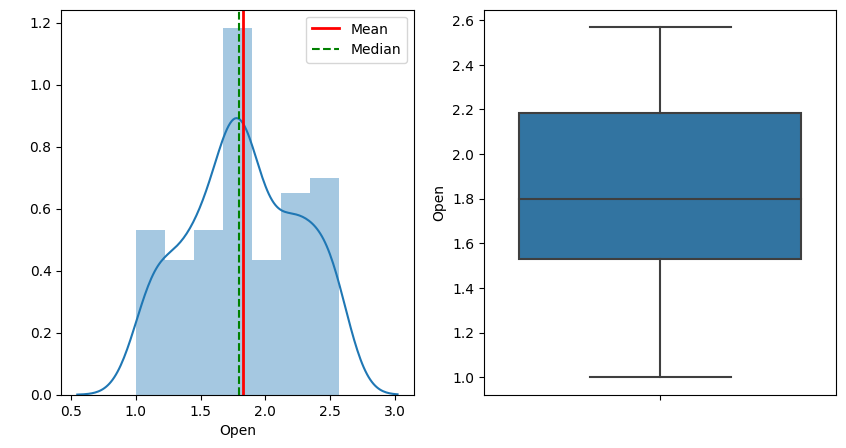

In [ ]:
# Chart - 2 visualization code
#independent variables
for var in indep_var:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)
    plt.axvline(np.log10(df[var]).mean(),color='red',linewidth=2, label='Mean')   # axvline plots a vertical line at a value (mean in this case)
    plt.axvline(np.log10(df[var]).median(),color='green',linestyle='dashed',linewidth=1.5, label='Median')
    plt.legend()
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]))
    fig.set_title('')
    fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

To see the distributions across all independent variables after transformation applied

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 3

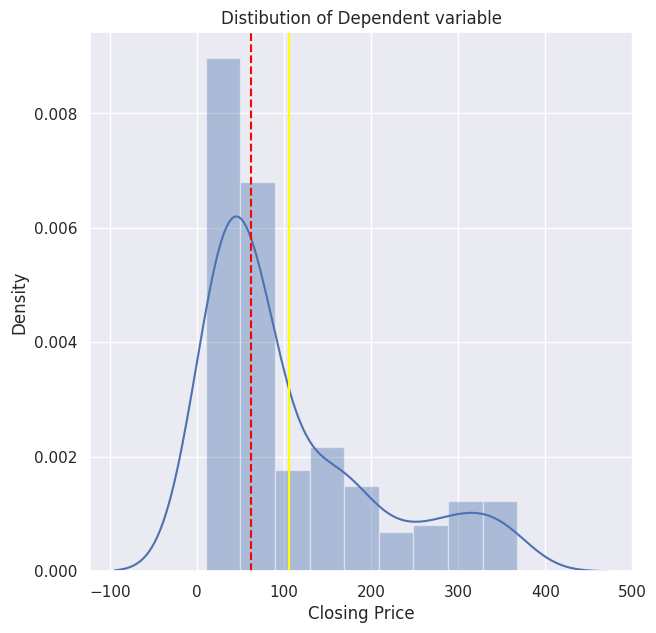

In [ ]:
# Chart - 3 visualization code

# Dependent variable 'Close'
#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('Closing Price')

plt.axvline(df['Close'].mean(),color='yellow')
plt.axvline(df['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price

#### Chart - 3

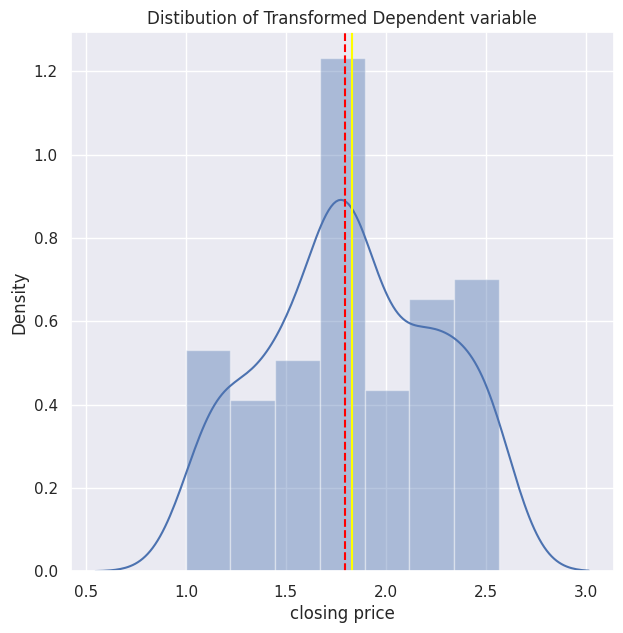

In [ ]:
# Distribution plot of closing price For applying log transformation
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')
plt.axvline(np.log10(df['Close']).mean(),color='yellow')
plt.axvline(np.log10(df['Close']).median(),color='red',linestyle='dashed')

##### 1. Why did you pick the specific chart?

To see the distributions of dependent variable after log10 transformation applied

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution. mean and median are almost same

#### Chart - 4

[Text(0.5, 1.0, 'Yes Bank closing price'), Text(0.5, 0, 'Year')]

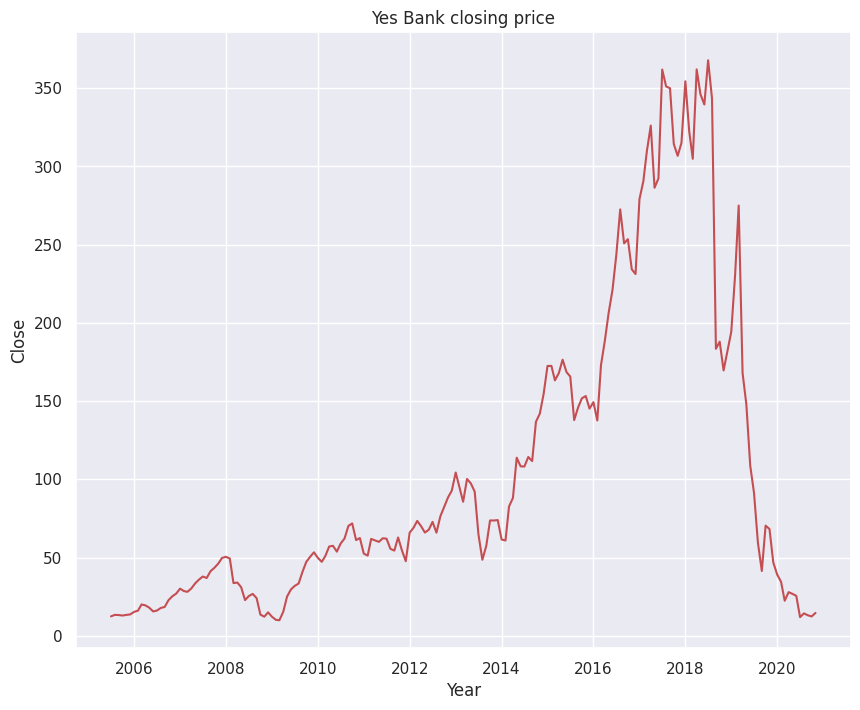

In [ ]:
# Chart - 4 visualization code
# Plotting the dependent variable
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x="Date", y="Close",data=df,color='r').set(title='Yes Bank closing price',xlabel='Year')

##### 1. Why did you pick the specific chart?

With this chart I can see how stock trend are going each year.

##### 2. What is/are the insight(s) found from the chart?

Here we can easly see in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving `Rana Kapoor`

#### Chart - 5

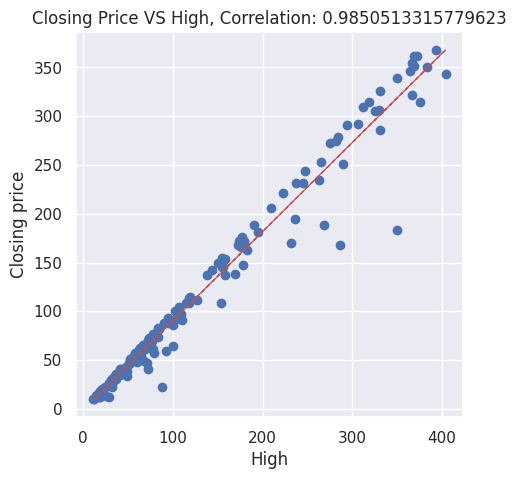

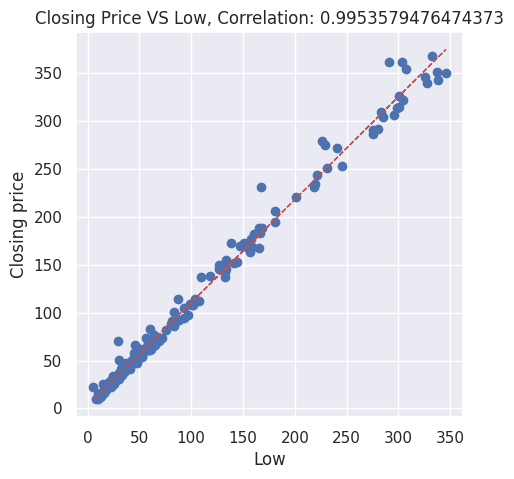

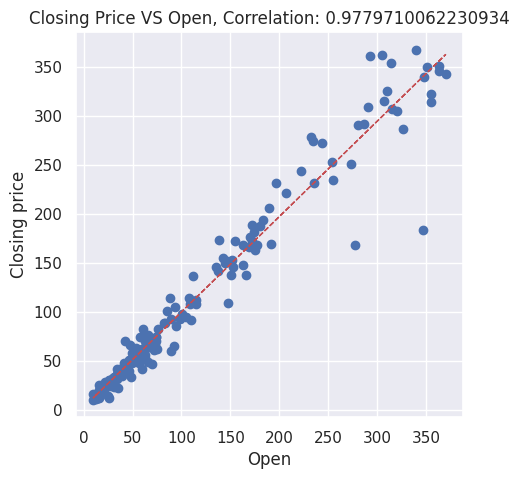

In [ ]:
# Chart - 5 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in indep_var:
  fig=plt.figure(figsize=(5,5))
  ax=fig.gca()
  feature=df[col]
  label=df["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing Price VS '+col+', Correlation: '+str(correlation))
  z=np.polyfit(df[col],df['Close'],1)
  y_hat=np.poly1d(z)(df[col])

  plt.plot(df[col],y_hat,"r--",lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

I want to see the correlation between independent variable and dependent variabls. Thats why i use scatter plot


##### 2. What is/are the insight(s) found from the chart?

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data

#### Chart - 6

<Axes: >

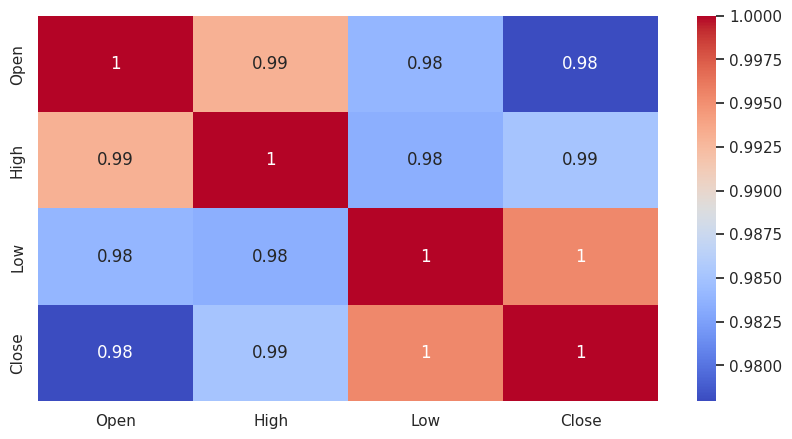

In [ ]:
# Chart - 6 visualization code
# Now let's visualise for the correlation among all variables.
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables)

##### 2. What is/are the insight(s) found from the chart?

As from above chart we can see that our data is Multicollinear. Multicollinearity can cause problems for some ML algorithms, such as linear regression, because it can lead to overfitting and unreliable coefficient estimates. By identifying variables with high correlations, we can decide whether to remove one of the variables or to use a different ML algorithm that is less sensitive to multicollinearity

#### Chart - 7

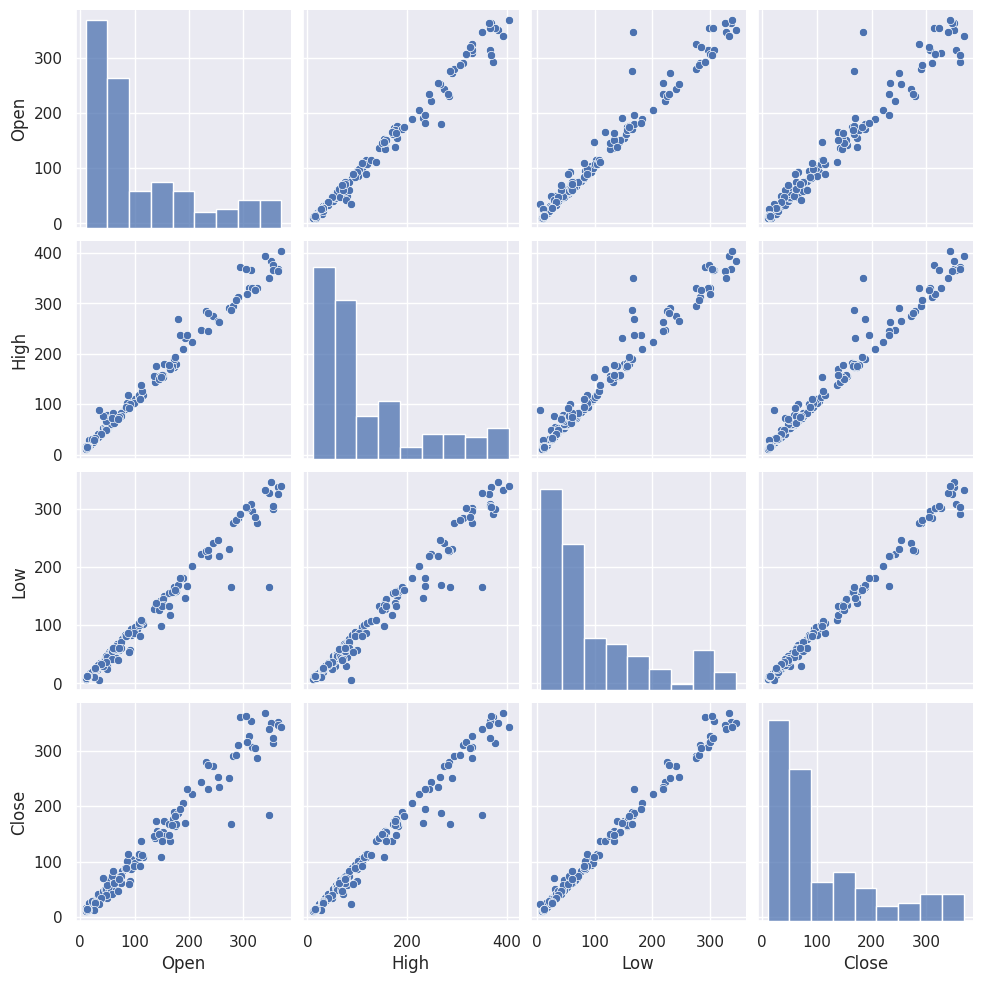

In [ ]:
# Chart - 7 visualization code
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

## ***5. Feature Engineering & Data Pre-processing***

**Variance Inflation Factor (VIF) values of Independent Variables.**

>**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values

* We have the very High VIF of Open, High, Low features in our dataset so we have to drop them which is least correlated with dependent variable

In [ ]:
# Here we will drop the open feature from the VIF matrix
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


We have dropped `Open` features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

### 1. Feature Transformation

In [ ]:
# Splitting our data into Dependent and Independent Variables

X = df.drop(columns=['Close','Date'])
y = df['Close']

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Answer - Yes,independent variables and dependent variables have skeweness. I have used log transformation as the skewness is small.

### 2. Data Spliting

In [ ]:
# splitting the dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

##### 1. What data splitting ratio have you used and why?

Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

<h1><b> We will build these regression models for our Dataset.</b>

1. Linear Regression
2. Ridge Rigression
3. Lasso Rigression
4. Elastic Net Regression
5. XG Boost Regrression

* By using **Cross-Validation**, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

## ***.6 ML Model Implementation***

### ML Model - 1 : Linear Regression

In [ ]:
# ML Model - 1 Implementation
linear_reg=LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train,y_train)

# Predict on the model
y_pred_linear = linear_reg.predict(X_test)

In [ ]:
# Checking the model parameters printing the intercept.
print(linear_reg.intercept_)

# printing the model coefficients.
print(linear_reg.coef_)

1.8292785179315048
[-0.04654099  0.19795929  0.23173905]


In [ ]:
#train accuracy of linear regression model
print(round(linear_reg.score(X_train,y_train),4))

0.8147


In [ ]:
# Test accuracy of linear regression model
print(round(linear_reg.score(X_test, y_test),4))

0.8226


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1513
Mean squared Error : 0.0316
Root Mean squared Error : 0.1778
R2 score : 0.8226
Adjusted R2 score : 0.8064


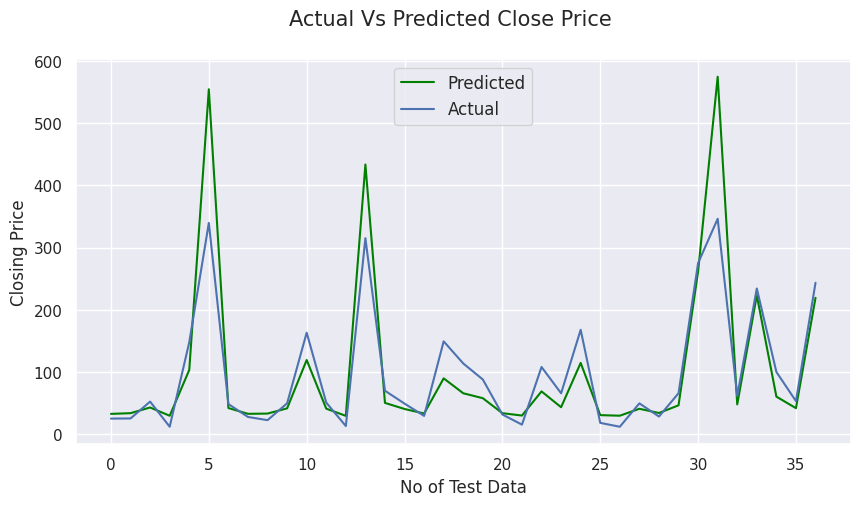

In [ ]:
# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(y_test,y_pred_linear),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error(y_test,y_pred_linear),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(y_test,y_pred_linear),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(y_test,y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")


# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_linear),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize =15)
plt.legend(["Predicted","Actual"], fontsize=12)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics = pd.DataFrame([MAE_linear, MSE_linear, RMSE_linear, R2_linear, Adjusted_R2_linear],columns=['Linear_Reg'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])
performance_metrics

,Linear_Reg
Mean Absolute Error,0.1513
Mean Squared Error,0.0316
Root Mean Squared Error,0.1778
R2 Score,0.8226
Adjusted R2 Score,0.8064


### ML Model - 2 : Ridge Regression

<h2><b><u>Ridge Regression:</u></b></h2>
<p style="text-align: justify;">Ridge regression performs &#8216;<strong>L2 regularization</strong>&#8216;, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:</p>
<h4>Objective = RSS + α * (sum of square of coefficients)</h4>
<p style="text-align: justify;">Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:</p>
<ol>
<li><strong>α = 0:</strong>
<ul>
<li>The objective becomes same as simple linear regression.</li>
<li>We&#8217;ll get the same coefficients as simple linear regression.</li>
</ul>
</li>
<li><strong>α = ∞:</strong>
<ul>
<li>The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.</li>
</ul>
</li>
<li><strong>0 &lt; α &lt; ∞:</strong>
<ul>
<li>The magnitude of α will decide the weightage given to different parts of objective.</li>
<li>The coefficients will be somewhere between 0 and ones for simple linear regression.</li>
</ul>
</li>
</ol>
<p style="text-align: justify;">I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We&#8217;ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.</p>

In [ ]:
# Initializing the model.
from sklearn.linear_model import Ridge

# ML Model - 2 Implementation
ridge = Ridge(alpha=0.0001, max_iter=3000)

# Fit the Algorithm
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1513
Mean Squared Error : 0.0316
Root Mean Squared Error : 0.1778
R2 Score : 0.8226
Adjusted R2 Score : 0.8064


Text(0, 0.5, 'Crossing Price')

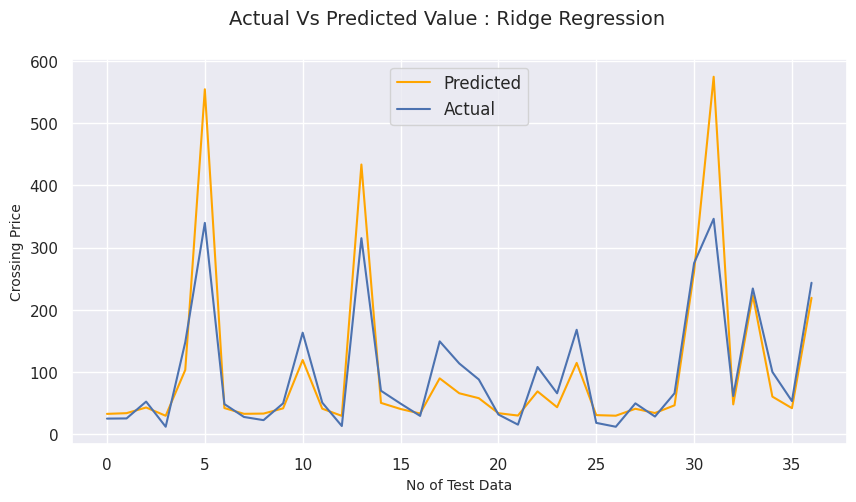

In [ ]:
# Test Performance
MAE_ridge = round(mean_absolute_error(y_test,y_pred_ridge),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge = round(mean_squared_error(y_test,y_pred_ridge),4)
print(f"Mean Squared Error : {MSE_ridge}")

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print(f"Root Mean Squared Error : {RMSE_ridge}")

R2_Score_ridge = round(r2_score(y_test,y_pred_ridge),4)
print(f"R2 Score : {R2_Score_ridge}")

Adjusted_R2_Score_ridge = round(1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_ridge}")

# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge),color='orange')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Ridge Regression', fontsize= 14)
plt.legend(['Predicted','Actual'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize = 10)
plt.ylabel('Crossing Price', fontsize= 10)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics1 = pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge, R2_Score_ridge, Adjusted_R2_Score_ridge],columns=['Ridge'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics  =pd.concat([performance_metrics , performance_metrics1],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge
Mean Absolute Error,0.1513,0.1513
Mean Squared Error,0.0316,0.0316
Root Mean Squared Error,0.1778,0.1778
R2 Score,0.8226,0.8226
Adjusted R2 Score,0.8064,0.8064


#### 2. Cross- Validation & Hyperparameter Tuning

#<b>📈Implementing Cross Validation Of Ridge</b>

**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation technique

In [ ]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 4))

 The Best Fit Alpha Value is found out to be : 0.1
 The negative MSE(mean squared error) score is : -0.0375


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)

Mean Absolute Error : 0.1514
Mean Squared Error : 0.0317
Root Mean Squared Error : 0.178
R2 Score : 0.8221
Adjusted R2 Score : 0.806


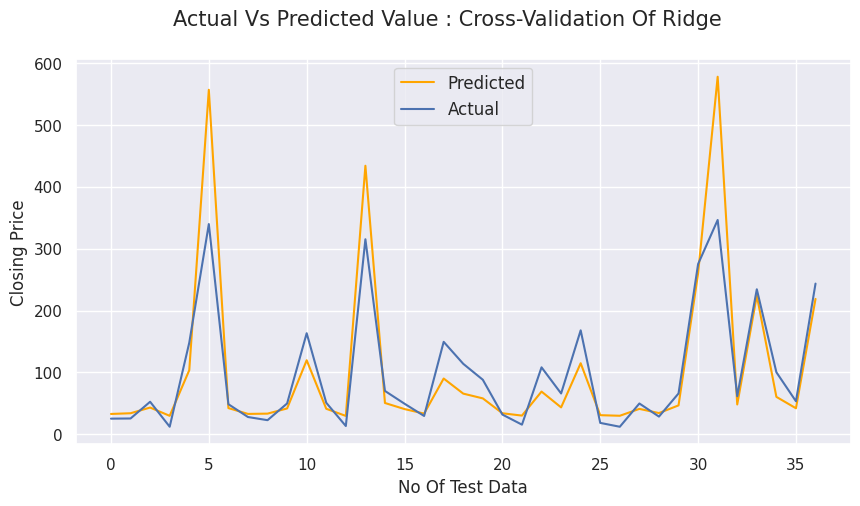

In [ ]:
# Test Performance
MAE_ridge1 = round(mean_absolute_error(y_test,y_pred_ridge1),4)
print(f"Mean Absolute Error : {MAE_ridge1}")

MSE_ridge1 = round(mean_squared_error(y_test,y_pred_ridge1),4)
print(f"Mean Squared Error : {MSE_ridge1}")

RMSE_ridge1 = round(np.sqrt(MSE_ridge1),4)
print(f"Root Mean Squared Error : {RMSE_ridge1}")

R2_Score_ridge1 = round(r2_score(y_test,y_pred_ridge1),4)
print(f"R2 Score : {R2_Score_ridge1}")

Adjusted_R2_Score_ridge1 = round(1-(1-r2_score(y_test,y_pred_ridge1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_ridge1}")

#Visualizing evaluation Metric Score chart
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,5))
plt.plot(predicted,color='orange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 15)
plt.legend(['Predicted','Actual'], fontsize = 12)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics2 = pd.DataFrame([MAE_ridge1, MSE_ridge1, RMSE_ridge1, R2_Score_ridge1, Adjusted_R2_Score_ridge1],columns=['Ridge CV'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics = pd.concat([performance_metrics, performance_metrics2],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV
Mean Absolute Error,0.1513,0.1513,0.1514
Mean Squared Error,0.0316,0.0316,0.0317
Root Mean Squared Error,0.1778,0.1778,0.1780
R2 Score,0.8226,0.8226,0.8221
Adjusted R2 Score,0.8064,0.8064,0.8060


### ML Model - 3

<h2><b><u>Lasso Regression</u></b></h2>
<p style="text-align: justify;">LASSO stands for <em>Least Absolute Shrinkage and Selection Operator</em>. I know it doesn&#8217;t give much of an idea but there are 2 key words here &#8211; &#8216;<em>absolute</em>&#8216; and &#8216;<em>selection</em>&#8216;.</p>
<p>Lets consider the former first and worry about the latter later.</p>
<p style="text-align: justify;">Lasso regression performs <strong>L1 regularization</strong>, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:</p>
<h4>Objective = RSS + α * (sum of absolute value of coefficients)</h4>
<p style="text-align: justify;">Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:</p>
<ol>
<li>α = 0: Same coefficients as simple linear regression</li>
<li>α = ∞: All coefficients zero (same logic as before)</li>
<li>0 &lt; α &lt; ∞: coefficients between 0 and that of simple linear regression</li>
</ol>
<p style="text-align: justify;">Yes its <em>appearing to be very similar to Ridge till now</em>. But just hang on with me and you&#8217;ll know the difference by the time we finish.</p>

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.0001, max_iter = 5000)

# Fit the Algorithm
lasso1.fit(X_train, y_train)

# prediction of train data
y_pred_lasso = lasso1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1515
Mean Squared Error : 0.0317
Root Mean Squared Error : 0.178
R2 Score : 0.822
Adjusted R2 Score : 0.8058


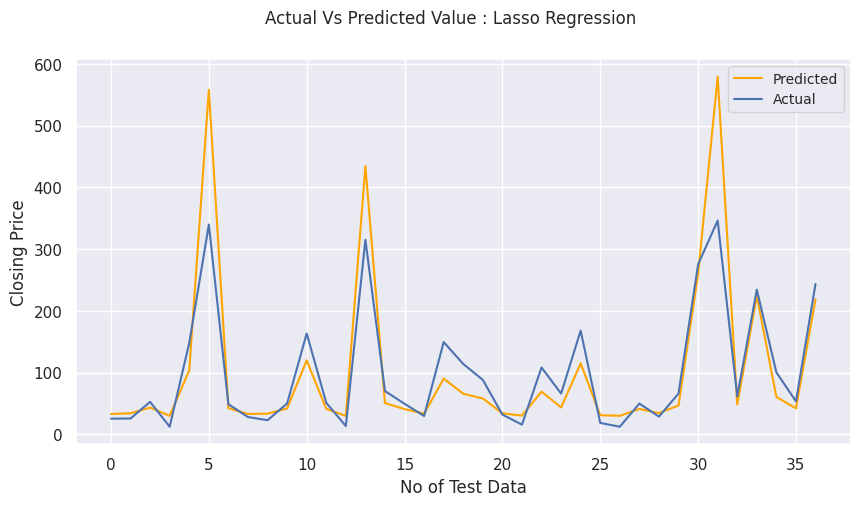

In [ ]:
# Test Performance
MAE_lasso = round(mean_absolute_error(y_test, y_pred_lasso),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso = round(mean_squared_error(y_test, y_pred_lasso),4)
print(f"Mean Squared Error : {MSE_lasso}")

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print(f"Root Mean Squared Error : {RMSE_lasso}")

R2_Score_lasso = round(r2_score(y_test, y_pred_lasso),4)
print(f"R2 Score : {R2_Score_lasso}")

Adjusted_R2_Score_lasso = round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_lasso}")


# Visualizing evaluation Metric Score chart
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,5))
plt.plot(10**(y_pred_lasso),color='orange')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Lasso Regression', fontsize = 12)
plt.legend(["Predicted","Actual"], fontsize=10)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid(True)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics3 = pd.DataFrame([MAE_lasso, MSE_lasso, RMSE_lasso, R2_Score_lasso, Adjusted_R2_Score_lasso],columns=['Lasso'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics =pd.concat([performance_metrics, performance_metrics3],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV,Lasso
Mean Absolute Error,0.1513,0.1513,0.1514,0.1515
Mean Squared Error,0.0316,0.0316,0.0317,0.0317
Root Mean Squared Error,0.1778,0.1778,0.1780,0.1780
R2 Score,0.8226,0.8226,0.8221,0.8220
Adjusted R2 Score,0.8064,0.8064,0.8060,0.8058


#### 2. Cross- Validation & Hyperparameter Tuning

# **📈Implemeting Cross Validation of Lasso**
---
**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation techniques.

In [ ]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyper parameter of Tuning For Lasso Regression

lasso = Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Prediction of test data
y_pred_lasso1 = lasso_regressor.predict(X_test)

print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_, 4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0367


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1528
Mean Squared Error : 0.0322
Root Mean Squared Error : 0.1794
R2 Score : 0.819
Adjusted R2 Score : 0.8025


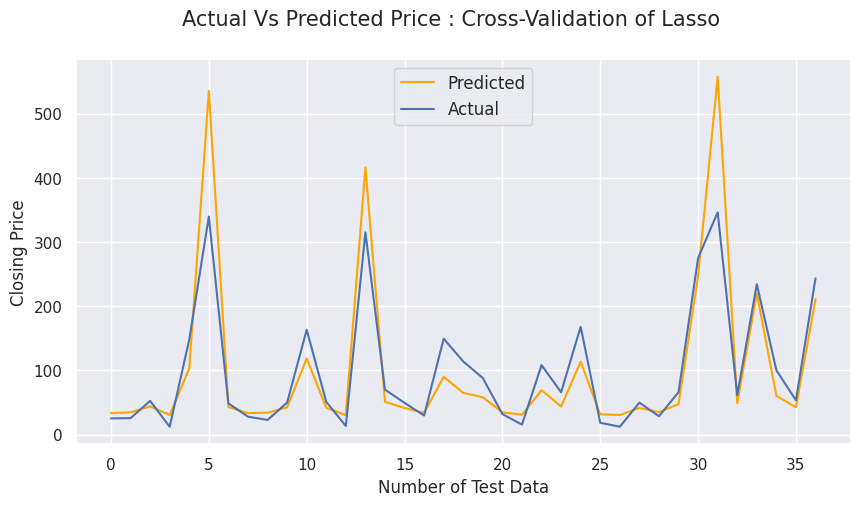

In [ ]:
# Test Performance
MAE_lasso1 = round(mean_absolute_error(y_test, y_pred_lasso1),4)
print(f"Mean Absolute Error : {MAE_lasso1}")

MSE_lasso1 = round(mean_squared_error(y_test, y_pred_lasso1),4)
print(f"Mean Squared Error : {MSE_lasso1}")

RMSE_lasso1 = round(np.sqrt(MSE_lasso1),4)
print(f"Root Mean Squared Error : {RMSE_lasso1}")

R2_Score_lasso1 = round(r2_score(y_test, y_pred_lasso1),4)
print(f"R2 Score : {R2_Score_lasso1}")

Adjusted_R2_Score_lasso1 = round(1-(1-r2_score(y_test, y_pred_lasso1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_lasso1}")

# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_lasso1),color='orange')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 15)
plt.legend(["Predicted","Actual"], fontsize=12)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid(True)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics4 = pd.DataFrame([MAE_lasso1, MSE_lasso1, RMSE_lasso1, R2_Score_lasso1, Adjusted_R2_Score_lasso1],columns=['Lasso CV'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics =pd.concat([performance_metrics, performance_metrics4], axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV,Lasso,Lasso CV
Mean Absolute Error,0.1513,0.1513,0.1514,0.1515,0.1528
Mean Squared Error,0.0316,0.0316,0.0317,0.0317,0.0322
Root Mean Squared Error,0.1778,0.1778,0.1780,0.1780,0.1794
R2 Score,0.8226,0.8226,0.8221,0.8220,0.8190
Adjusted R2 Score,0.8064,0.8064,0.8060,0.8058,0.8025


### ML Model - 4

# **Elastic Net Regression**
---
**Elastic Net** is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [ ]:
#import elasticNet model
from sklearn.linear_model import ElasticNet

# Initializing the model.
elastic_reg = ElasticNet(alpha=0.0001, l1_ratio=1)

#fitting data into Elastic Net
elastic_reg.fit(X_train,y_train)

# Predict on the model
y_elastic_pred = elastic_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1515
Mean Squared Error : 0.0317
Root Mean Squared Error : 0.178
R2 Score : 0.822
Adjusted R2 Score : 0.8058


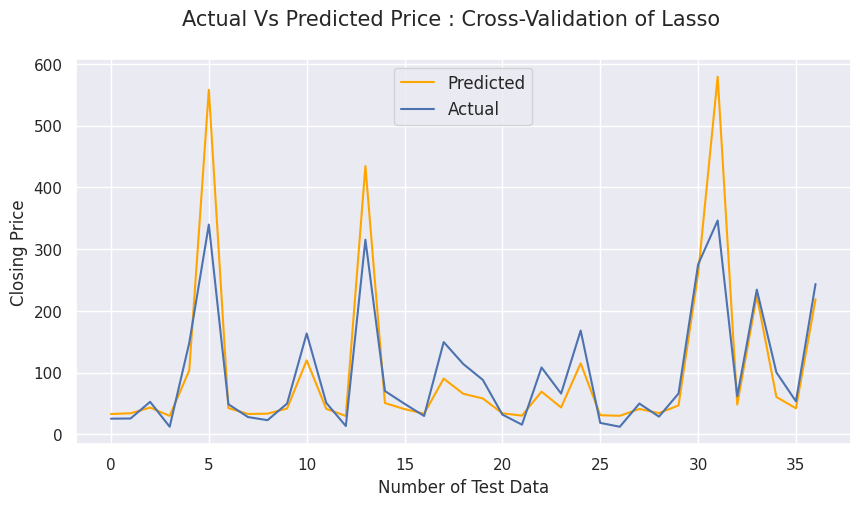

In [ ]:
# Test Performance of Elastic Net model
# Test Performance
MAE_elastic = round(mean_absolute_error(y_test, y_elastic_pred),4)
print(f"Mean Absolute Error : {MAE_elastic}")

MSE_elastic = round(mean_squared_error(y_test, y_elastic_pred),4)
print(f"Mean Squared Error : {MSE_elastic}")

RMSE_elastic = round(np.sqrt(MSE_elastic),4)
print(f"Root Mean Squared Error : {RMSE_elastic}")

R2_Score_elastic = round(r2_score(y_test, y_elastic_pred),4)
print(f"R2 Score : {R2_Score_elastic}")

Adjusted_R2_Score_elastic = round(1-(1-r2_score(y_test, y_elastic_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_elastic}")

# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
plt.plot(10**(y_elastic_pred),color='orange')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 15)
plt.legend(["Predicted","Actual"], fontsize=12)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid(True)


In [ ]:
# Create a dataframe to store model matrics
performance_metrics5 = pd.DataFrame([MAE_elastic, MSE_elastic, RMSE_elastic, R2_Score_elastic, Adjusted_R2_Score_elastic],columns=['ElasticNet'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics =pd.concat([performance_metrics, performance_metrics5],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV,Lasso,Lasso CV,ElasticNet
Mean Absolute Error,0.1513,0.1513,0.1514,0.1515,0.1528,0.1515
Mean Squared Error,0.0316,0.0316,0.0317,0.0317,0.0322,0.0317
Root Mean Squared Error,0.1778,0.1778,0.1780,0.1780,0.1794,0.1780
R2 Score,0.8226,0.8226,0.8221,0.8220,0.8190,0.8220
Adjusted R2 Score,0.8064,0.8064,0.8060,0.8058,0.8025,0.8058


#### 2. Cross- Validation & Hyperparameter Tuning
# **📈Implementing Cross Validation of Elastic Net**
---
**Cross-Validation** is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
* To overcome over-fitting problems, we use a technique called Cross-Validation.
* Let’s dive deep and learn about some of the model evaluation techniques.

In [ ]:
# Hyper-Parameter Tuning for Elastic Net
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1],
              'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_model.fit(X_train, y_train)

# Prediction of test data .
y_pred_elastic1 = elastic_model.predict(X_test)

print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.1 0.1
The negative mean squared error for is:  -0.036


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.1542
Mean Squared Error : 0.0332
Root Mean Squared Error : 0.1822
R2 Score : 0.8136
Adjusted R2 Score : 0.7967


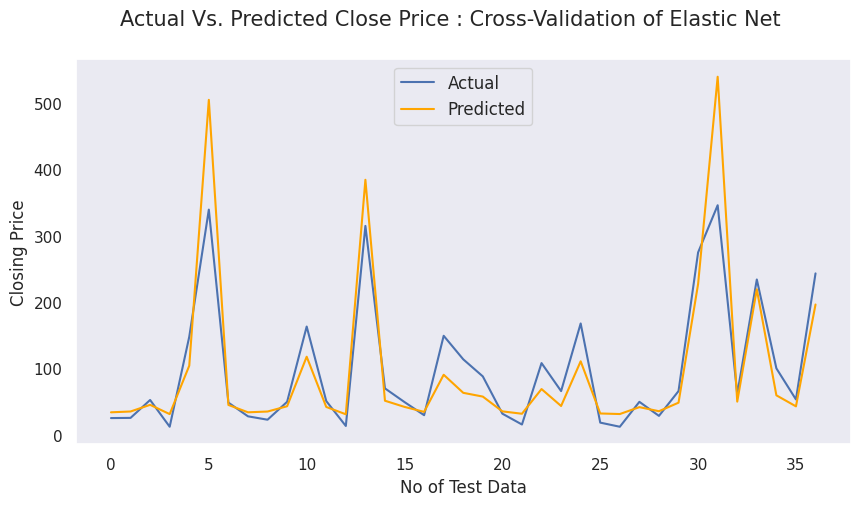

In [ ]:
# Test Performance of Elastic Net model
# Test Performance
MAE_elastic1 = round(mean_absolute_error(y_test, y_pred_elastic1),4)
print(f"Mean Absolute Error : {MAE_elastic1}")

MSE_elastic1 = round(mean_squared_error(y_test, y_pred_elastic1),4)
print(f"Mean Squared Error : {MSE_elastic1}")

RMSE_elastic1 = round(np.sqrt(MSE_elastic1),4)
print(f"Root Mean Squared Error : {RMSE_elastic1}")

R2_Score_elastic1 = round(r2_score(y_test, y_pred_elastic1),4)
print(f"R2 Score : {R2_Score_elastic1}")

Adjusted_R2_Score_elastic1 = round(1-(1-r2_score(y_test, y_pred_elastic1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_elastic1}")


# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1),color='orange')
plt.suptitle('Actual Vs. Predicted Close Price : Cross-Validation of Elastic Net', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [ ]:
# Create a dataframe to store model matrics
performance_metrics6 = pd.DataFrame([MAE_elastic1, MSE_elastic1, RMSE_elastic1, R2_Score_elastic1, Adjusted_R2_Score_elastic1],columns=['ElasticNet_CV'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics =pd.concat([performance_metrics, performance_metrics6],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV,Lasso,Lasso CV,ElasticNet,ElasticNet_CV
Mean Absolute Error,0.1513,0.1513,0.1514,0.1515,0.1528,0.1515,0.1542
Mean Squared Error,0.0316,0.0316,0.0317,0.0317,0.0322,0.0317,0.0332
Root Mean Squared Error,0.1778,0.1778,0.1780,0.1780,0.1794,0.1780,0.1822
R2 Score,0.8226,0.8226,0.8221,0.8220,0.8190,0.8220,0.8136
Adjusted R2 Score,0.8064,0.8064,0.8060,0.8058,0.8025,0.8058,0.7967


### ML Model - 5
# **Implementing XG Boost Regression**
---
**XGBoost** is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

>XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
#import XGBoost Regressor
from xgboost import XGBRegressor

# ML Model - 4 Implementation
xgb = XGBRegressor()

# Fit the Algorithm
xgb.fit(X_train,y_train)

# prediction of test data
y_pred_XGB = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error : 0.0347
Mean Squared Error : 0.0018
Root Mean Squared Error : 0.0424
R2 Score : 0.9899
Adjusted R2 Score : 0.989


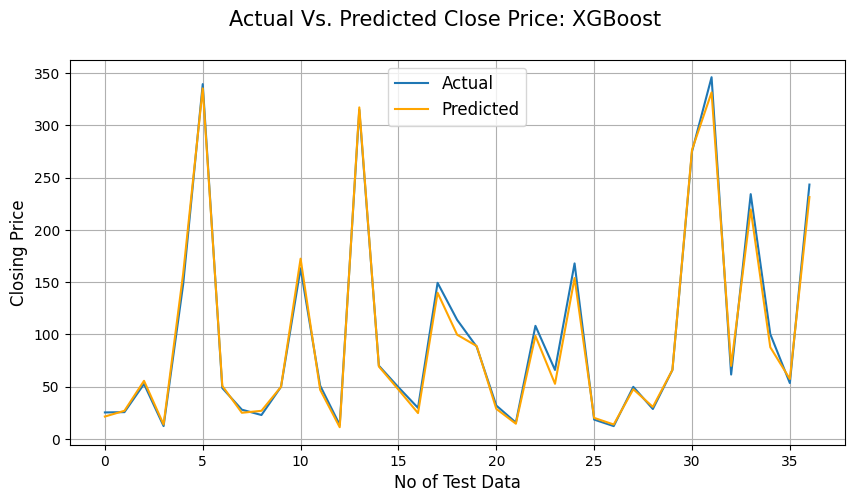

In [ ]:
# Test Performance of XGBoost model after validation

# Test Performance
MAE_xgb = round(mean_absolute_error(y_test, y_pred_XGB),4)
print(f"Mean Absolute Error : {MAE_xgb}")

MSE_xgb = round(mean_squared_error(y_test, y_pred_XGB),4)
print(f"Mean Squared Error : {MSE_xgb}")

RMSE_xgb = round(np.sqrt(MSE_xgb),4)
print(f"Root Mean Squared Error : {RMSE_xgb}")

R2_Score_xgb = round(r2_score(y_test, y_pred_XGB),4)
print(f"R2 Score : {R2_Score_xgb}")

Adjusted_R2_Score_xgb = round(1-(1-r2_score(y_test, y_pred_XGB))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print(f"Adjusted R2 Score : {Adjusted_R2_Score_xgb}")


# Actual Price vs. Predicted Price for XGboost after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XGB),color='orange')
plt.suptitle('Actual Vs. Predicted Close Price: XGBoost', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

In [ ]:
# Create a dataframe to store model matrics
performance_metrics7 = pd.DataFrame([MAE_xgb, MSE_xgb, RMSE_xgb, R2_Score_xgb, Adjusted_R2_Score_xgb],columns=['XGB'],
                  index=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error","R2 Score","Adjusted R2 Score"])

# concat dataframes
performance_metrics =pd.concat([performance_metrics, performance_metrics7],axis=1)

In [ ]:
# compare side by side
performance_metrics

,Linear_Reg,Ridge,Ridge CV,Lasso,Lasso CV,ElasticNet,ElasticNet_CV,XGB
Mean Absolute Error,0.1513,0.1513,0.1514,0.1515,0.1528,0.1515,0.1542,0.0347
Mean Squared Error,0.0316,0.0316,0.0317,0.0317,0.0322,0.0317,0.0332,0.0018
Root Mean Squared Error,0.1778,0.1778,0.1780,0.1780,0.1794,0.1780,0.1822,0.1780
R2 Score,0.8226,0.8226,0.8221,0.8220,0.8190,0.8220,0.8136,0.9899
Adjusted R2 Score,0.8064,0.8064,0.8060,0.8058,0.8025,0.8058,0.7967,0.9890


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer : Here we consider `Mean Squared  Error` and `Adjusted R2 Score`(Adj R2) as evalution metrics. MSE and Adj R2 as evaluation metrics can have the following positive impacts:

1. Improved accuracy of predictions: By optimizing a model's performance based on MSE and Adj R2, businesses can improve the accuracy of their predictions. This can lead to better decision-making, improved resource allocation, and reduced costs associated with errors or inefficiencies.

2. Improved model selection: By comparing the performance of different models based on MSE and Adj R2, businesses can select the best model for their specific problem. This can lead to improved performance and better outcomes for the business.
Overall, using MSE and Adj R2 as evaluation metrics can help businesses improve the accuracy of their predictions, gain insights into their data and make better decisions

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer : I am considering XGBRegressor as my final model.

This model has the highest R2 and adjusted r2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable and also considering all the features. Ridge also performed well. but has low adjusted r2 in test data than in the train data. It indicates, that all the feautures are not necessary for ridge to predict the closing price.

XGboost capturing all features and still predicting better than ridge. It even has low RMSE among all the three models and also performed well on test data than on the train data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 I will be using XGBoost model and for model explainability I am using SHAP (SHapley Additive exPlanations) value.

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

I am using TreeExplainer to explain my XGBoost Regressor(xgb_gs

In [ ]:
best_model = XGBRegressor()

best_model.fit(X_train,y_train) # fit a data into model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

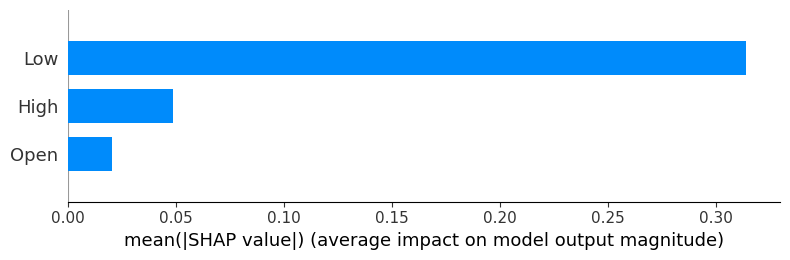

In [ ]:
# creating a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

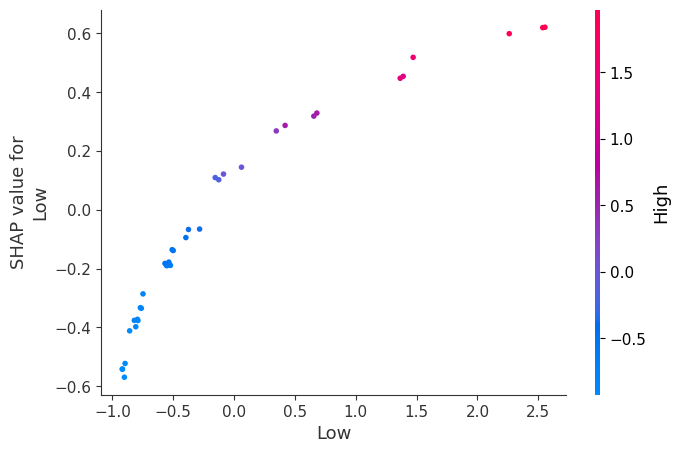

In [ ]:
# creating a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

I plotted mean SHAP plot in which for each feature, we calculate the mean of the absolute SHAP values across all observations.
There is one bar for each feature.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions.

This plot can be used as a feature importance plot to highlight features that are important to a model’s predictions

SHAP : SHAP values quantify the contribution of each feature to the predicted outcome for a particular instance. The summary plot shows the features ranked in descending order of importance, based on the mean absolute SHAP values are calculated for each instance in the test set. By examining the summary plot, we can identify High and Low have the strongest impact on the model's predictions

# **Conclusion**

The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

I have developed 5 models Linear Regression, Lasso, Ridge, ElasticNet And XGBRegressor. XGBRegressor model shows promising result with R2 score of 0.98 both on train and test dataset, therefore it can be used to solve this problem.

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

The dataset has only monthly related price, a daily level price would be more accurate as model can analyze important patterns like week opening price and weekend price. Volume of the data if provided can also be useful in making prediction. A stock prediction involved many aspects like holidays, political decisions, events, un precedented disasters, human decisions. This can be better predicted by having all these features and using time series models like ARIMA and LSTM can ve predicted more accurately.

Given the dataset and features, Our model is performing well on all data-points. With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.

1. The popularity of stock closing is growing extremely rapidly day by day   which encourage researcher to find new methods if any fraud happens.

2. This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

4. High, low, open are directly correlate with the closing price of stocks

5. Target variable(dependent variable) strongly dependent on independent variables

6. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***